In [45]:
#Importing of Libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


In [46]:
#Importing of Dataset
path="/content/drive/MyDrive/Dataset/Unemployment in India.csv"
df=pd.read_csv(path)
df


,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Area
0,Andhra Pradesh,31-05-2019,Monthly,3.65,11999139.0,43.24,Rural
1,Andhra Pradesh,30-06-2019,Monthly,3.05,11755881.0,42.05,Rural
2,Andhra Pradesh,31-07-2019,Monthly,3.75,12086707.0,43.50,Rural
3,Andhra Pradesh,31-08-2019,Monthly,3.32,12285693.0,43.97,Rural
4,Andhra Pradesh,30-09-2019,Monthly,5.17,12256762.0,44.68,Rural
...,...,...,...,...,...,...,...
763,NaN,NaN,NaN,NaN,NaN,NaN,NaN
764,NaN,NaN,NaN,NaN,NaN,NaN,NaN
765,NaN,NaN,NaN,NaN,NaN,NaN,NaN
766,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [47]:
df.shape #Showing of rows and columns

(768, 7)

In [48]:
df.describe()

,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%)
count,740.000000,7.400000e+02,740.000000
mean,11.787946,7.204460e+06,42.630122
std,10.721298,8.087988e+06,8.111094
min,0.000000,4.942000e+04,13.330000
25%,4.657500,1.190404e+06,38.062500
50%,8.350000,4.744178e+06,41.160000
75%,15.887500,1.127549e+07,45.505000
max,76.740000,4.577751e+07,72.570000


In [49]:
df.isna().sum() #Finding of missing values

Region                                      28
 Date                                       28
 Frequency                                  28
 Estimated Unemployment Rate (%)            28
 Estimated Employed                         28
 Estimated Labour Participation Rate (%)    28
Area                                        28
dtype: int64

In [51]:
df = df.rename(columns={df.columns[0]:'state', df.columns[3]:'EUR' , df.columns[4]:'EE',df.columns[5]:'ELPR',df.columns[6]:'Region'})
df.head() #Renaming of the columns name

,state,Date,Frequency,EUR,EE,ELPR,Region
0,Andhra Pradesh,31-05-2019,Monthly,3.65,11999139.0,43.24,Rural
1,Andhra Pradesh,30-06-2019,Monthly,3.05,11755881.0,42.05,Rural
2,Andhra Pradesh,31-07-2019,Monthly,3.75,12086707.0,43.50,Rural
3,Andhra Pradesh,31-08-2019,Monthly,3.32,12285693.0,43.97,Rural
4,Andhra Pradesh,30-09-2019,Monthly,5.17,12256762.0,44.68,Rural


In [53]:
df ["state"].unique() #Finding of the unique values in the State column

array(['Andhra Pradesh', 'Assam', 'Bihar', 'Chhattisgarh', 'Delhi', 'Goa',
       'Gujarat', 'Haryana', 'Himachal Pradesh', 'Jammu & Kashmir',
       'Jharkhand', 'Karnataka', 'Kerala', 'Madhya Pradesh',
       'Maharashtra', 'Meghalaya', 'Odisha', 'Puducherry', 'Punjab',
       'Rajasthan', 'Sikkim', 'Tamil Nadu', 'Telangana', 'Tripura',
       'Uttar Pradesh', 'Uttarakhand', 'West Bengal', nan, 'Chandigarh'],
      dtype=object)

In [54]:
df ['Region'].unique() #Finding of the unique values in the Region column

array(['Rural', nan, 'Urban'], dtype=object)

In [55]:
df.groupby('Region').size() #Finding of the size of each Region

Region
Rural    359
Urban    381
dtype: int64

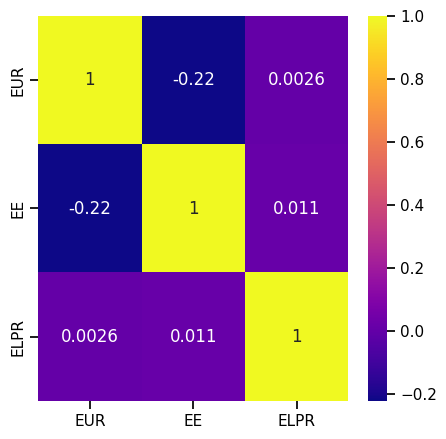

In [58]:
heat_maps=df[['EUR','EE','ELPR']] #Showing of the correlation
heat_maps=heat_maps.corr()
plt.figure(figsize=(5,5))
sns.heatmap(heat_maps,annot=True,cmap='plasma');

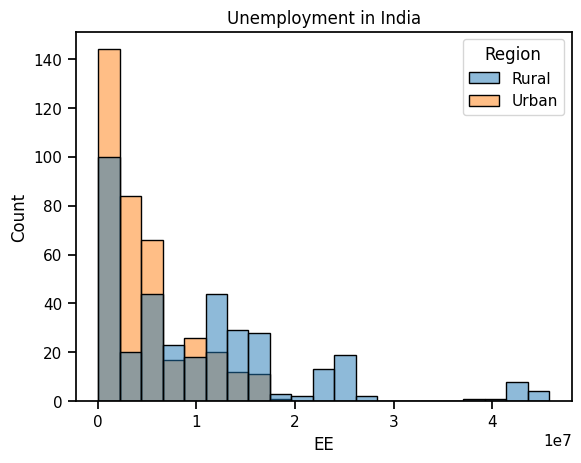

In [111]:
df.columns= ["state","Date","Frequency","EUR","EE","ELPR","Region"]
plt.title("Unemployment in India")
sns.histplot(x="EE", hue="Region", data=df)
plt.show()

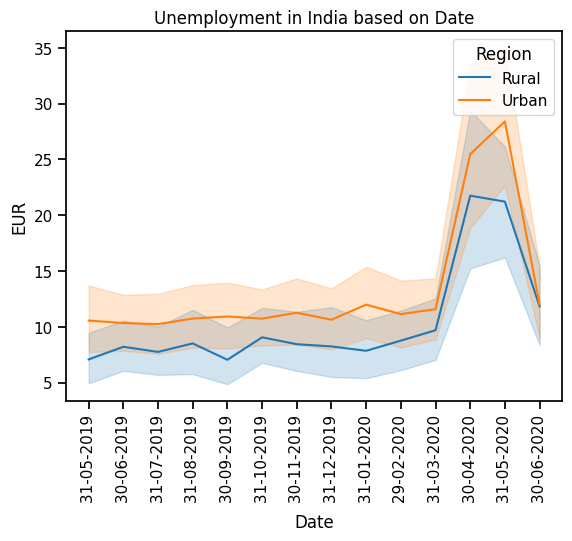

In [87]:
sns.lineplot(x="Date",y="EUR",hue="Region",data=df) #Showing of the growth of Unemployment based on Date
plt.title("Unemployment in India based on Date")
plt.xticks(rotation=90)
plt.show()

In [75]:
print(df.columns)

Index(['State', 'Date', 'Frequency', 'EUR', 'EE', 'ELPR', 'Region'], dtype='object')


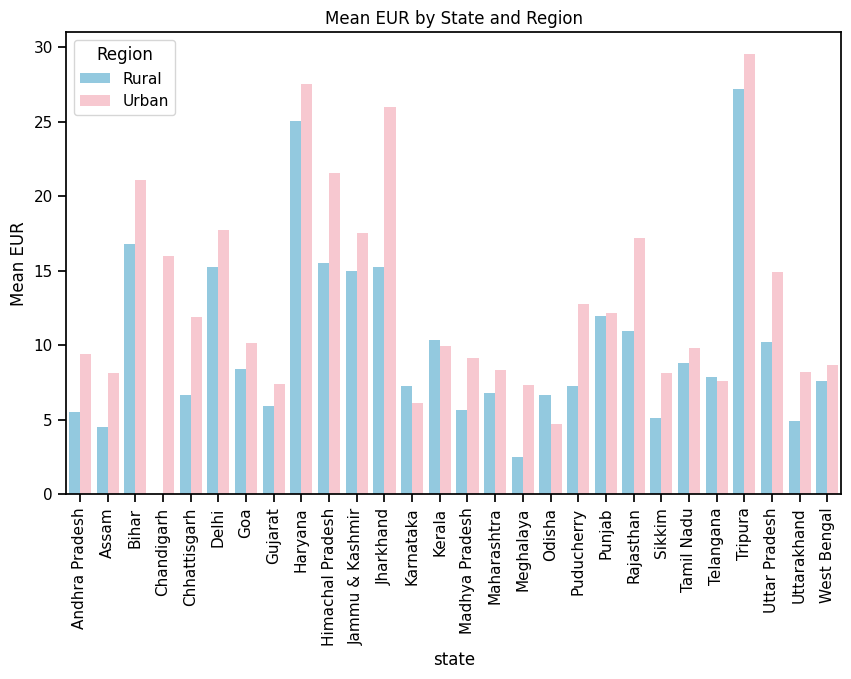

In [105]:
group_EUR = df.groupby(['state','Region']).agg({'EUR': 'mean'})
group_EUR #Finding of the mean EUR

plt.figure(figsize=(10, 6))
custom_palette = {'Rural': 'skyblue', 'Urban': 'pink'}
sns.barplot(data=group_EUR, x='state', y='EUR', hue='Region',palette=custom_palette)
plt.title('Mean EUR by State and Region')
plt.xlabel('state')
plt.xticks(rotation=90)
plt.ylabel('Mean EUR')
plt.legend(title='Region')
plt.show()

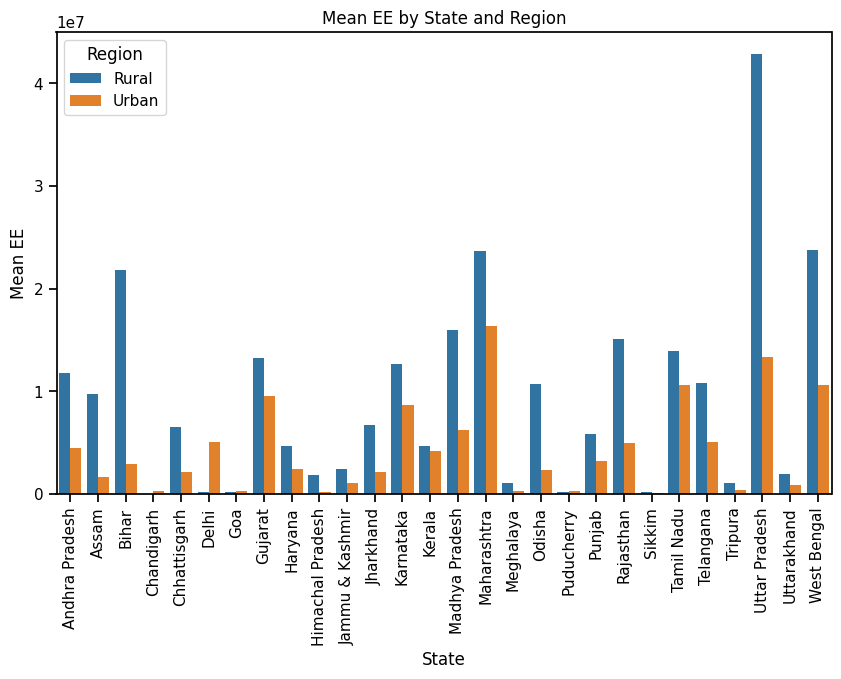

In [96]:
group_EE = df.groupby(['state', 'Region']).agg({'EE': 'mean'})
group_EE #Finding of the mean EE

plt.figure(figsize=(10, 6))
sns.barplot(data=group_EE, x='state', y='EE', hue='Region')
plt.title('Mean EE by State and Region')
plt.xlabel('State')
plt.xticks(rotation=90)
plt.ylabel('Mean EE')
plt.legend(title='Region')
plt.show()


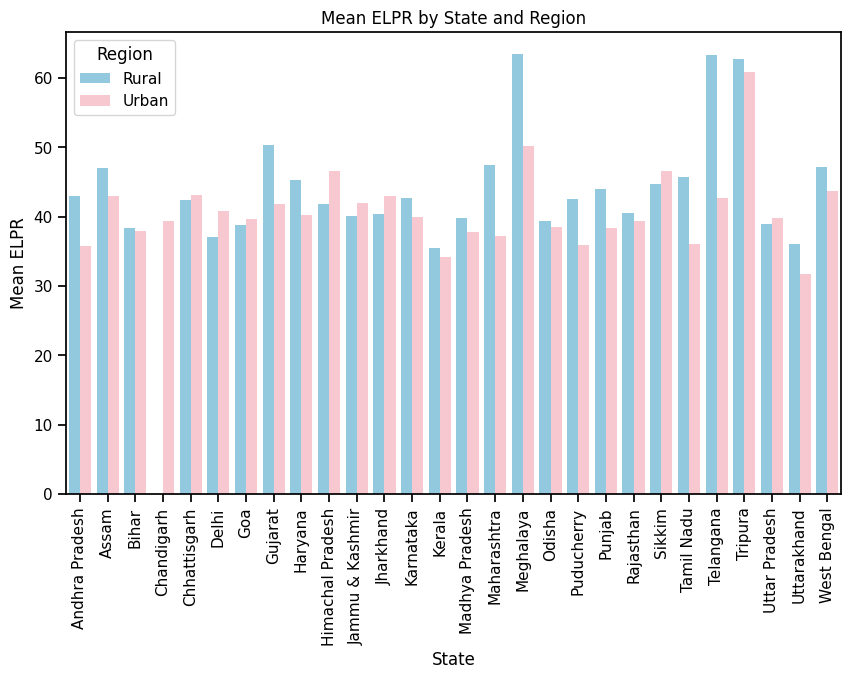

In [109]:
group_ELPR = df.groupby(['state', 'Region']).agg({'ELPR': 'mean'})
group_ELPR #Finding of the mean ELPR

plt.figure(figsize=(10, 6))
custom_palette = {'Rural': 'skyblue', 'Urban': 'pink'}
sns.barplot(data=group_ELPR, x='state', y='ELPR', hue='Region',palette=custom_palette)
plt.title('Mean ELPR by State and Region')
plt.xlabel('State')
plt.xticks(rotation=90)
plt.ylabel('Mean ELPR')
plt.legend(title='Region')
plt.show()

<ipython-input-113-939523a39a12>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(df,x="Region",palette="husl",stat='percent').tick_params(axis="x",rotation=90)


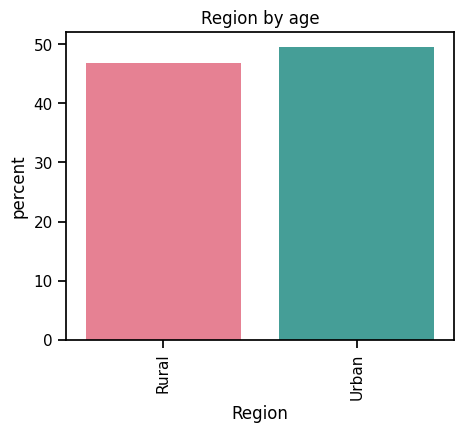

In [113]:
plt.figure(figsize = (5,4))  #Showing of the region based on age
sns.countplot(df,x="Region",palette="husl",stat='percent').tick_params(axis="x",rotation=90)
plt.title("Region by age")
plt.show();